## Predicting the Sale Price of Bulldozers using Machine Learning

-We're going to predict the sale price of bulldozers from the past data.

-We're using the *Regression Problem*.

-For the data evaluation metric we'll be using RMSLE(Root Mean Square Log Error).

-Dataset got from the Kaggle.com

In [1]:
## import data analysis model 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
#import the dataset of Training and validations 

bulldozers_price = pd.read_csv('Data/TrainAndValid.csv',
                              low_memory=False)

In [3]:
bulldozers_price.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#dtypes 

bulldozers_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
#length of datasets 

len(bulldozers_price)

412698

In [6]:
#missing values 
bulldozers_price.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

## Plotting 

#### Plot the saledate the saleprice by using scatter plot( Scatter plot- shows the realtionship between tow variables)

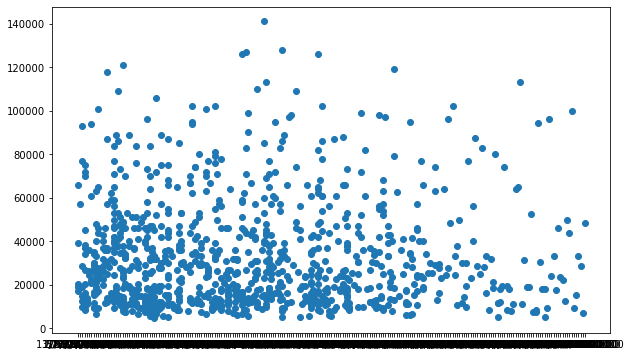

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bulldozers_price['saledate'][:1000], bulldozers_price['SalePrice'][:1000])

## Parse-dates


- let's use the prase_dates for the dates column to make the format of date appropriate.

In [8]:
#import the datasets 

bulldozers_price = pd.read_csv('Data/TrainAndValid.csv',
                              low_memory=False,
                              parse_dates=['saledate'])

In [9]:
#saledate column after parse_Date

bulldozers_price['saledate'][:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

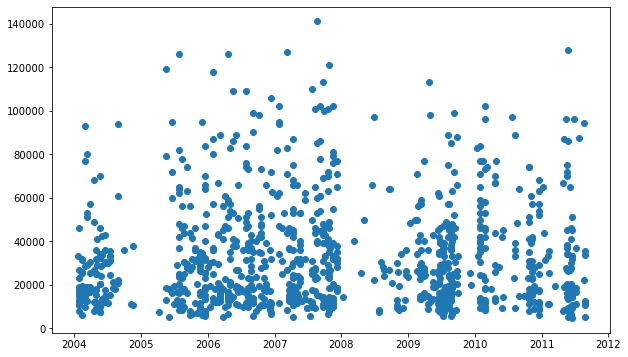

In [10]:
#plot the Saledate and SalePrice 

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bulldozers_price['saledate'][:1000], bulldozers_price['SalePrice'][:1000])

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

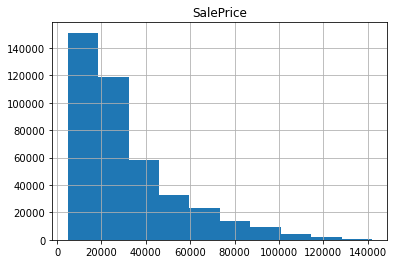

In [11]:
#plot the saleprice 
bulldozers_price.hist('SalePrice')

In [12]:
bulldozers_price.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
bulldozers_price.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


## Sort the DataFrame

 - While working on the time series dataframe, we must the sort the dates in appropriate format.
 

In [14]:
#sort the datasets

bulldozers_price.sort_values(by=['saledate'], inplace=True, ascending=True)

bulldozers_price.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [15]:
bulldozers_price['saledate']

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

## Make a copy of data 

In [16]:
#copy

bulldozers_price_copy = bulldozers_price.copy()

In [17]:
bulldozers_price_copy

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Add the Datetime parameters 

In [18]:

#add year column
bulldozers_price_copy['SaleYear'] = bulldozers_price_copy.saledate.dt.year

#add month column
bulldozers_price_copy['SaleMonth'] = bulldozers_price_copy.saledate.dt.month

#add day columns
bulldozers_price_copy['SaleDay'] = bulldozers_price_copy.saledate.dt.day

#drop the saledate column

bulldozers_price_copy.drop('saledate', axis=1)



,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,4,28
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,4,28
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,4,28


In [19]:
bulldozers_price_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


## Let's do Data Explorations 

#### Plot the chart of sales according to the products 

Text(0.5, 1.0, 'Chart Analysis of Sale-Price and Product Group Description')

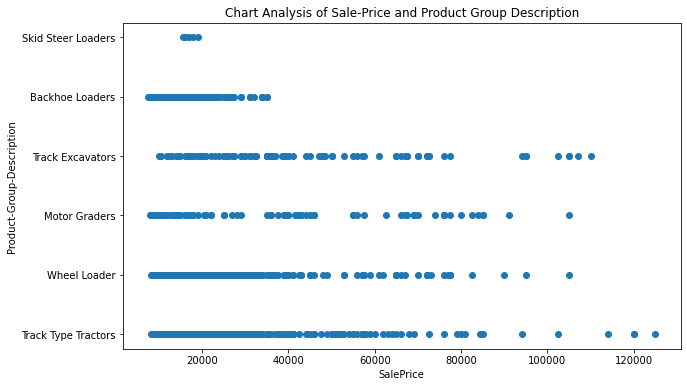

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bulldozers_price_copy['SalePrice'][:1000], bulldozers_price_copy['ProductGroupDesc'][:1000])

plt.xlabel('SalePrice')
plt.ylabel('Product-Group-Description')
plt.title('Chart Analysis of Sale-Price and Product Group Description')

#### Plot the chart of Year-made product and their price wise sale

Text(0.5, 1.0, 'Chart Analysis of YearMade and Saleprice of products')

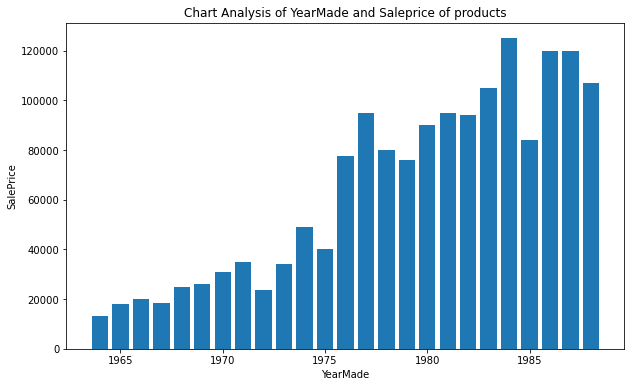

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(bulldozers_price_copy['YearMade'][:1000], bulldozers_price_copy['SalePrice'][:1000])

plt.xlabel("YearMade")
plt.ylabel('SalePrice')
plt.title('Chart Analysis of YearMade and Saleprice of products')

#### Plot the chart of Saleday and Saleprice

- How much sale done on a particular day

Text(0.5, 1.0, 'Chart analysis of Saleday and saleprice')

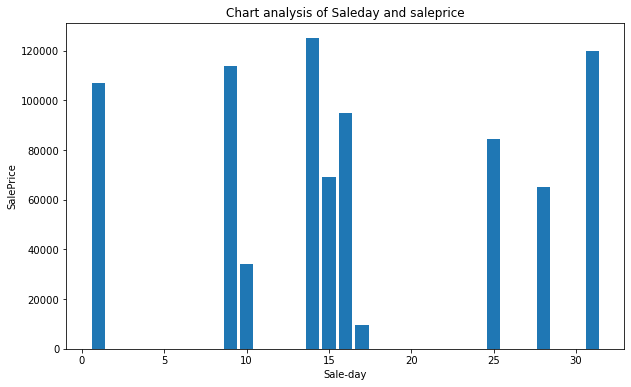

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(bulldozers_price_copy['SaleDay'][:1000], bulldozers_price_copy['SalePrice'][:1000])

plt.xlabel('Sale-day')
plt.ylabel('SalePrice')
plt.title('Chart analysis of Saleday and saleprice')

#### Plot the chart of Saleprices and State

- to find the sales in particular state

<BarContainer object of 1000 artists>

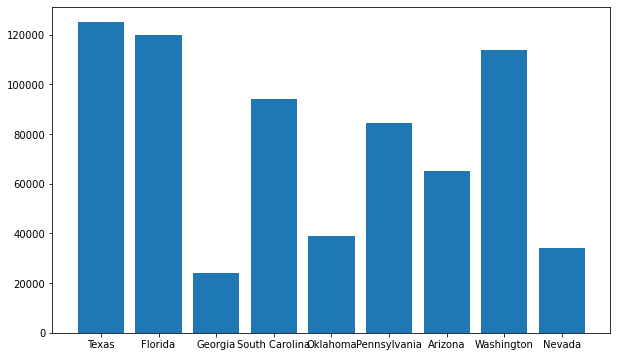

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(bulldozers_price_copy['state'][:1000], bulldozers_price_copy['SalePrice'][:1000])

## Modelling 

In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(bulldozers_price_copy.drop('SalePrice', axis=1), bulldozers_price_copy['SalePrice'])

ValueError: could not convert string to float: 'Low'

In [25]:
bulldozers_price_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

In [26]:
bulldozers_price_copy.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

## Converting the strings into category

In [27]:
#check the strings columns

for label, content in bulldozers_price_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [28]:
#convert the strings columns to category

for label, content in bulldozers_price_copy.items():
    if pd.api.types.is_string_dtype(content):
        bulldozers_price_copy[label] = content.astype('category').cat.as_ordered()

In [29]:
bulldozers_price_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 1

## Fill the missing values 

#### Fill the numerical missing values

In [30]:
#check the numerical columns 


for label, content in bulldozers_price_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay


In [31]:
#check the missing values of numerical columns 

for label, content in bulldozers_price_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [32]:
# Fill the missing values 

for label, content in bulldozers_price_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        #fill the missing values column
        bulldozers_price_copy[label] = content.fillna(content.median())

In [33]:
bulldozers_price_copy.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

####  Fill the missing values of categorical columns 

In [34]:
#check the categorical columns 

for label, content in bulldozers_price_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
## check the missing values of the categorical columns 

for label, content in bulldozers_price_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        if not pd.isnull(content).sum():
            print(label)

saledate
fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [36]:
## Fill the missing values of the categorical columns 

for label, content in bulldozers_price_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        #fill the missing values 
        bulldozers_price_copy[label] = pd.Categorical(content).codes+1

In [37]:
bulldozers_price_copy.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
saledate                    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock 

# Build a Machine Learning Model

In [38]:
%%time

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(bulldozers_price_copy.drop('SalePrice', axis=1), bulldozers_price_copy['SalePrice'])

Wall time: 15min 11s


RandomForestRegressor()

In [39]:
model.score(bulldozers_price_copy.drop('SalePrice', axis=1), bulldozers_price_copy['SalePrice'])

0.9878948230149273

## Splitting Data into Train and Validation

In [40]:
bulldozers_price_copy.SaleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: SaleYear, dtype: int64

In [41]:
####  split data into train and validation

df_val = bulldozers_price_copy[bulldozers_price_copy.SaleYear == 2012]
df_train = bulldozers_price_copy[bulldozers_price_copy.SaleYear != 2012]

In [42]:
len(df_val), len(df_train)

(11573, 401125)

In [43]:
#split data into x and y 

X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

In [44]:
X_train.shape, y_train.shape, X_valid.shape , y_valid.shape

((401125, 55), (401125,), (11573, 55), (11573,))

## Build an Evalution Function

In [45]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

#### Creating an function to eualuate the model

In [46]:
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MSE' : mean_absolute_error(y_train, train_preds),
             'Validation MSE' : mean_absolute_error(y_valid, val_preds),
             'Training RMSLE': rmsle(y_train, train_preds),
             'Validation RMSLE' : rmsle(y_valid, val_preds),
             'Training r2_Score': r2_score(y_train, train_preds),
             'Validation r2_Score': r2_score(y_valid, val_preds)}
    return scores

In [47]:
show_scores(model)

{'Training MSE': 1553.1708463795574,
 'Validation MSE': 1835.3367113108095,
 'Training RMSLE': 0.08318102863260102,
 'Validation RMSLE': 0.08612356070206702,
 'Training r2_Score': 0.9879065032086816,
 'Validation r2_Score': 0.9872916008117654}

### Use the max_samples option in random forest for the appropriate score

In [48]:
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=30000)

In [49]:
%%time

model.fit(X_train, y_train)


Wall time: 38 s


RandomForestRegressor(max_samples=30000, n_jobs=-1, random_state=42)

In [50]:
#score when max_samples is 10000.
show_scores(model)

{'Training MSE': 4634.374785416017,
 'Validation MSE': 6553.756200639418,
 'Training RMSLE': 0.22090571272439782,
 'Validation RMSLE': 0.27200693847399554,
 'Training r2_Score': 0.9003035321154216,
 'Validation r2_Score': 0.859434779614487}

In [51]:
#score when max_samples is 20000.
show_scores(model)

{'Training MSE': 4634.374785416017,
 'Validation MSE': 6553.756200639418,
 'Training RMSLE': 0.22090571272439782,
 'Validation RMSLE': 0.27200693847399554,
 'Training r2_Score': 0.9003035321154216,
 'Validation r2_Score': 0.859434779614487}

In [52]:
#score when max_samples is 30000.
show_scores(model)

{'Training MSE': 4634.374785416017,
 'Validation MSE': 6553.756200639418,
 'Training RMSLE': 0.22090571272439782,
 'Validation RMSLE': 0.27200693847399554,
 'Training r2_Score': 0.9003035321154216,
 'Validation r2_Score': 0.859434779614487}

## let's use the hyperparameters tunning for the better score

#### Using RandomizedSearchCV

In [53]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Different RandomForestRegressor hyperparameters

rf_grid = {'n_estimators' :np.arange(10, 100, 10),
          'max_depth' : [None, 3 , 5 , 10],
          'min_samples_split'  : np.arange(2, 20, 2),
          'min_samples_leaf' : np.arange(1, 20, 2),
          'max_features' : [0.5, 1, 'sqrt','auto'],
          'max_samples' : [10000]}

#run the model to check the scores 

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions= rf_grid,
                             n_iter=5,
                             cv=5,
                             verbose=True)

rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.8min finished


Wall time: 1min 53s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [54]:
show_scores(rs_model)

{'Training MSE': 6949.753955043294,
 'Validation MSE': 8309.000246443575,
 'Training RMSLE': 0.31121449741147084,
 'Validation RMSLE': 0.33258780224650525,
 'Training r2_Score': 0.792119902778154,
 'Validation r2_Score': 0.7776132880496911}

## Build an ideal model 

In [55]:
%%time 

##let's prepare the ideal model

ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs= -1,
                                   max_samples=None)

ideal_model.fit(X_train, y_train)

Wall time: 1min 4s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3,
                      min_samples_split=14, n_estimators=40, n_jobs=-1)

In [56]:
show_scores(ideal_model)

{'Training MSE': 3091.7816689326523,
 'Validation MSE': 5906.200331994072,
 'Training RMSLE': 0.1531630418751454,
 'Validation RMSLE': 0.24330681067307083,
 'Training r2_Score': 0.9533057650871828,
 'Validation r2_Score': 0.882908422574594}

## Making Predictions 

- On test datasets

In [57]:
#import the test dataset 

test = pd.read_csv('Data/Test.csv',
                  low_memory=False,
                  parse_dates=['saledate'])

In [58]:
test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [59]:
#make Predictions on the test data 
test_preds = ideal_model.predict(test)

ValueError: could not convert string to float: 'Low'

## Preprocessing the data (getting the test dataset in the same format as our training dataset)


- to make the predictions 

In [60]:
def preprocess_data(df):
    
    #add year column
    df['SaleYear'] = df.saledate.dt.year
    #add month column
    df['SaleMonth'] = df.saledate.dt.month
    #add day columns
    df['SaleDay'] = df.saledate.dt.day

    #drop the saledate column
    df.drop('saledate', axis=1, inplace =True)
    
    ## Fill the missing values 
    ###  Fill the missing values 

    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            #fill the missing values column
            df[label] = content.fillna(content.median())
            
            
            #fill the categorical values 
            
        if not pd.api.types.is_numeric_dtype(content):
                #fill the missing values 
                df[label] = pd.Categorical(content).codes+1
                
    return df        

            

In [61]:
## Preprocess the test data 

test = preprocess_data(test)
test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,0,0,0,0,0,0,0,2012,5,3
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,0,0,0,0,0,3,2,2012,5,10
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,1,1,0,0,0,0,0,2012,5,10
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,2,2,0,0,0,0,0,2012,5,10
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,0,0,1,4,5,0,0,2012,5,10


In [62]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,1,4593,...,0,0,1,8,6,0,0,1989,1,17
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,2,1820,...,0,0,0,0,0,4,2,1989,1,31
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2,2348,...,0,0,1,8,6,0,0,1989,1,31
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,2,1819,...,0,0,0,0,0,4,2,1989,1,31
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2,2119,...,0,0,1,6,5,0,0,1989,1,31


In [63]:
#make predictions 

test_preds = ideal_model.predict(test)

ValueError: Number of features of the model must match the input. Model n_features is 55 and input n_features is 54 

In [64]:
# we can find how columns are differ using sets 

set(X_train.columns) - set(test.columns)

{'saledate'}

In [65]:
# Manually adjust the test 

test['saledate'] = False
test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,saledate
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,0,0,0,0,0,0,2012,5,3,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,0,0,0,0,3,2,2012,5,10,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,1,0,0,0,0,0,2012,5,10,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,2,0,0,0,0,0,2012,5,10,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,0,1,4,5,0,0,2012,5,10,False


In [68]:
test_preds = ideal_model.predict(test)

test_preds

array([53838.58946482, 18673.76291912, 50961.47411523, ...,
       24739.05532075, 60778.0112673 , 63961.78726417])

In [69]:
## Format predictions in a tabular format 

df_preds = pd.DataFrame()
df_preds['SalesID'] = test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,53838.589465
1,1227844,18673.762919
2,1227847,50961.474115
3,1227848,58806.846713
4,1227863,48483.640981
...,...,...
12452,6643171,61695.465340
12453,6643173,59199.875569
12454,6643184,24739.055321
12455,6643186,60778.011267


In [70]:
#Export the Predictions data 

df_preds.to_csv('Data/test_prediction.csv',
               index=False)

## Feature Importance 

- Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (SalePrice).

In [71]:
#find the feature importance 

ideal_model.feature_importances_

array([2.89294568e-02, 2.23639693e-02, 5.61928469e-02, 1.22337428e-03,
       2.78820646e-03, 1.92497834e-01, 2.54506313e-03, 9.81558721e-04,
       6.42177738e-02, 4.44058654e-02, 3.10884050e-02, 7.16773072e-02,
       5.42744849e-03, 3.54948296e-02, 1.31819582e-01, 5.87216185e-02,
       5.17990498e-03, 8.23364520e-03, 4.62966716e-03, 3.49351153e-03,
       7.16643228e-02, 8.62921735e-04, 6.58734687e-05, 1.17467208e-03,
       1.62609720e-04, 1.75220623e-03, 4.29156615e-05, 5.96314730e-04,
       7.15143669e-03, 4.88080661e-03, 3.04087260e-03, 8.55910643e-03,
       8.87288680e-03, 6.18399377e-03, 3.43146564e-04, 2.38384394e-03,
       1.47519671e-02, 1.56117304e-03, 2.36243723e-02, 1.96732108e-02,
       3.86036698e-03, 2.03901945e-03, 9.57330718e-04, 1.34854325e-03,
       5.95884693e-04, 8.55821256e-04, 3.12675389e-04, 3.37985257e-04,
       3.67227393e-03, 1.72461755e-03, 3.42876471e-04, 5.09686978e-04,
       2.49255742e-02, 4.42268164e-03, 4.83414153e-03])

In [72]:
# plotting feature importance 

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features" : columns,
                        "feature_importances" : importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    #plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Features Importances')
    ax.invert_yaxis()

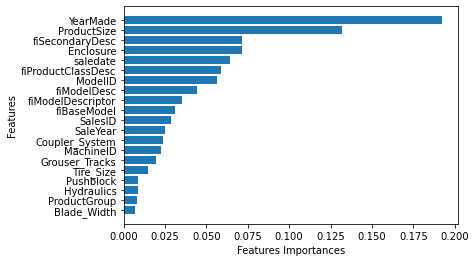

In [73]:
plot_features(X_train.columns, ideal_model.feature_importances_)